In [171]:
import numpy as np
import pandas as pd
import os

#defining folderpath
folderpath = r'C:\Users\Nuri\Desktop' 

#defining filename
filename = 'theProject.csv'

#defining filepath as folderpath + filename
filepath = os.path.join(folderpath, filename)

#creating the dataframe from the file with StaffID column is set as Index
dfemployee = pd.read_csv(filepath, index_col=['StaffID'])
dfemployee.fillna("NaN", inplace=True)

In [172]:
# calculating the age of the employee at their most recent position (whether they've left the firm or currently working)
from datetime import datetime
indexesLeaveDate = []
for x in range(3090):
    try:
        leaveDate = dfemployee.iloc[x, 1]
        cutOffDate = datetime(2018, 1, 1)
        if(leaveDate == "NaN"):
            continue
        else:
            leaveDateTimeDate = datetime.strptime(leaveDate, '%m/%d/%Y')
            leaveDateTimeDate.strftime('%Y-%m-%d')
        
        
            if(leaveDateTimeDate<cutOffDate):
                indexesLeaveDate.append(x)
    except:
        print("something went wrong")
dfemployee.drop([dfemployee.index[x] for x in indexesLeaveDate], inplace=True)

In [173]:
dfemployee.shape

(2377, 73)

In [174]:
# calculating the age of the employee at their most recent position (whether they've left the firm or currently working)
from datetime import datetime
indexes = []
for x in range(2377):
        hireDate = dfemployee.iloc[x, 0]
        cutOffDate = datetime(2019, 1, 1)
        hireDateTimeDate = datetime.strptime(hireDate, '%m/%d/%Y')
        hireDateTimeDate.strftime('%Y-%m-%d')
        
        
        if(hireDateTimeDate>cutOffDate):
            indexes.append(x)
dfemployee.drop([dfemployee.index[x] for x in indexes], inplace=True)

In [175]:
dfemployee.shape

(2037, 73)

In [176]:
workedLessThan12Month = []
for x in range(2037):
        workMonthDate = dfemployee.iloc[x, 72]      
        
        if(workMonthDate<=12):
            workedLessThan12Month.append(1)
        else:
            workedLessThan12Month.append(0)

In [177]:
listofDropColumns=['Hire Date','Leave Date','Date of Birth', "Status Details", "WorkMonths"]
for col in listofDropColumns:
    dfemployee.drop([col], inplace =True, axis = 1)

In [178]:
print(len(workedLessThan12Month))

2037


In [179]:
dfemployee["WorkedAtLeast12Month"] = workedLessThan12Month

In [180]:
X = dfemployee.drop(["WorkedAtLeast12Month"], axis = 1)
y = dfemployee["WorkedAtLeast12Month"]

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 2 (0.113913)
2. feature 58 (0.095428)
3. feature 1 (0.087795)
4. feature 60 (0.068280)
5. feature 54 (0.037270)
6. feature 51 (0.034968)
7. feature 43 (0.034454)
8. feature 33 (0.031444)
9. feature 52 (0.029282)
10. feature 62 (0.027069)
11. feature 23 (0.026533)
12. feature 49 (0.024774)
13. feature 19 (0.024418)
14. feature 66 (0.023523)
15. feature 55 (0.022591)
16. feature 63 (0.020740)
17. feature 31 (0.018945)
18. feature 39 (0.015728)
19. feature 14 (0.015425)
20. feature 15 (0.014748)
21. feature 37 (0.014393)
22. feature 40 (0.013356)
23. feature 46 (0.012845)
24. feature 13 (0.012803)
25. feature 57 (0.011681)
26. feature 5 (0.011342)
27. feature 21 (0.010570)
28. feature 47 (0.010371)
29. feature 27 (0.010349)
30. feature 20 (0.010244)
31. feature 24 (0.010114)
32. feature 26 (0.010077)
33. feature 17 (0.009188)
34. feature 50 (0.009110)
35. feature 0 (0.008424)
36. feature 42 (0.008

NameError: name 'std' is not defined

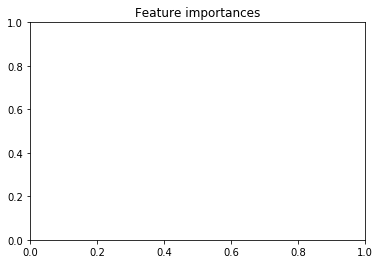

In [167]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Build a forest and compute the feature importances
forest = DecisionTreeClassifier()

forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [156]:
X.iloc[:,68].head()

StaffID
TR996033    14.1
TR996240    30.0
TR995458    45.1
TR996280     5.9
TR996799    18.9
Name: WorkMonths, dtype: float64

In [181]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

decisionTreeScores=[[[],[],[]]]
randomForestScores=[[[],[],[]]]
logisticsRegressionScores=[[[],[],[]]]
svmScores=[[[],[],[]]]

scores=[decisionTreeScores, randomForestScores, logisticsRegressionScores, svmScores]

def kfoldcrossval(X, y, clf, kFold, metrics, rand_state=42):
    clIndex = 0
    for cl in clf:
        kIndex = 0
        for k in kFold:
            cv = StratifiedKFold(n_splits=k, random_state=rand_state, shuffle=True)
            for train_index, test_index in cv.split(X, y):
                X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
                cl.fit(X_train, y_train)
                y_pred = cl.predict(X_test)
                metric_index = 0
                for x in metrics:
                    score = x(y_test, y_pred)
                    scores[clIndex][kIndex][metric_index].append(score)
                    metric_index+=1
                #print(confusion_matrix(y_test, y_pred))
            kIndex+=1
        clIndex+=1

In [182]:
clf = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), svm.SVC()]
k = [100]
rand_state=42
metrics = [precision_score,accuracy_score,recall_score]
kfoldcrossval(X, y, clf, k, metrics, rand_state)

C:\Users\Nuri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nuri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nuri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nuri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nuri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefi

In [183]:
for x in scores:
    for y in x:
        for z in y:
            print(sum(z)/len(z))

0.2853333333333333
0.8949273182957385
0.245
0.22249999999999998
0.9043997493734329
0.175
0.22
0.9182080200501246
0.14
0.0
0.91687969924812
0.0
